In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (8, 6)

In [5]:
class Experiment:
    def __init__(self, y_u_data_file_path, params):
        self.y_u_data = pd.read_csv(y_u_data_file_path)
        
        self.rho_kgpm3 = params['rho_kgpm3']
        self.v_inf_mps = params['v_inf_mps']
        self.y_loc_m = self.y_u_data['y'].values * 0.01
        self.u_mps = self.y_u_data['u'].values
        
        self.w_CV_m = params['w_CV_m']
        self.h_CV_m = self.y_loc_m[-1] - self.y_loc_m[0]
        self.A_CV_m2 = self.w_CV_m * self.h_CV_m
        
        self.q_inf_Pa = params['q_inf_Pa']
        self.dP_Pa = params['dP_Pa']
        self.d_obj_m = params['d_obj_m']
        self.A_obj_m2 = self.d_obj_m * self.w_CV_m
        
        # Drag calculation
        M1x = self.rho_kgpm3 * (self.v_inf_mps ** 2) * self.A_CV_m2
        M2x = self.w_CV_m * np.trapz(self.rho_kgpm3 * (self.u_mps ** 2), self.y_loc_m)
        M_term = M1x - M2x
        P_term = self.dP_Pa * self.A_CV_m2
        
        # Account for lost mass
        m_in = self.rho_kgpm3 * self.v_inf_mps * self.A_CV_m2
        m_out = self.rho_kgpm3 * self.w_CV_m * np.trapz(self.u_mps, self.y_loc_m)
        self.dm = m_in - m_out
        M_lost = self.dm * self.v_inf_mps # Assume lost at freestream
        M_term -= M_lost
        
        self.drag_N = M_term + P_term
        self.cd = self.drag_N / (self.q_inf_Pa * self.A_obj_m2)
        
    def wake_survey(self):
        plt.plot(self.u_mps, self.y_loc_m, 'o')
        plt.xlim(0, self.u_mps[-1] + 0.5)
        plt.grid(alpha=0.3)
        plt.title("Wake survey for HBR")
        plt.xlabel("u (m/s)")
        plt.ylabel("y-location (m)")
        plt.show()
        
    def report_drag(self):
        print("Drag: {} N".format(self.drag_N))
        print("cd: {}".format(self.cd))
        
    def visualize_c_mass(self):
        plt.plot(self.u_mps, self.y_loc_m, 'o', label='out')
        plt.vlines(self.v_inf_mps, self.y_loc_m[0], self.y_loc_m[-1], linestyles='dotted', label='in')
        plt.xlim(0, self.u_mps[-1] + 0.5)
        plt.grid(alpha=0.3)
        plt.legend()
        plt.title("Velocity profiles in and out of CV")
        plt.xlabel("u (m/s)")
        plt.ylabel("y-location (m)")

Drag: 1.1033735693999982 N
cd: 1.3553216250098554


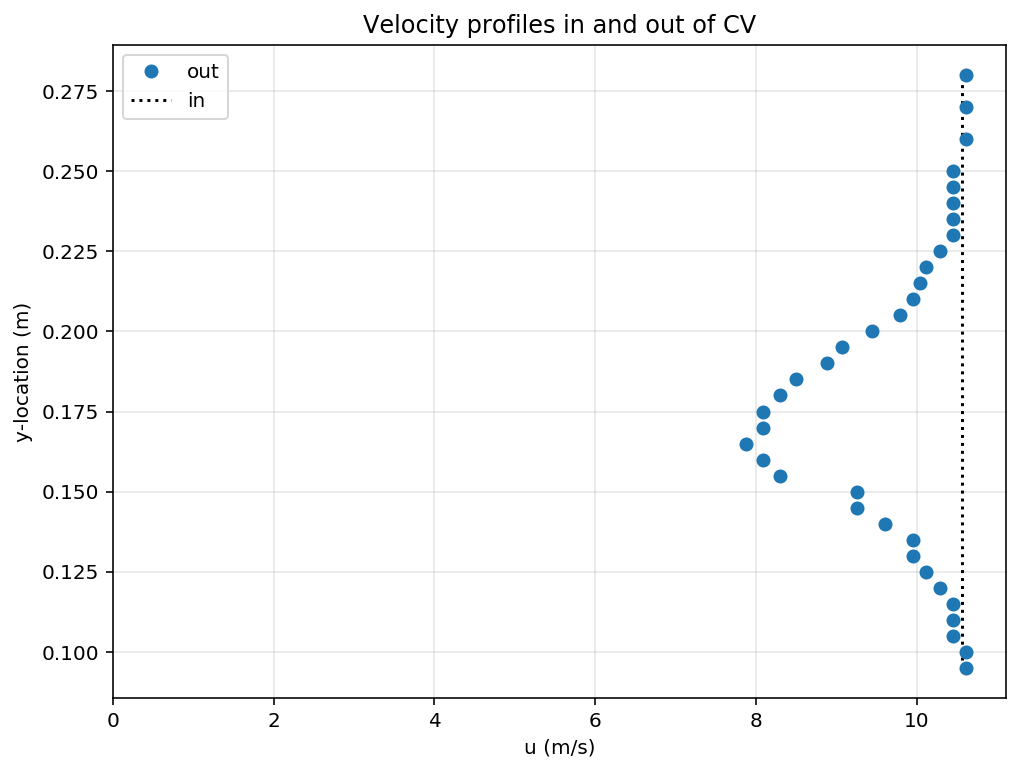

In [6]:
HBR = Experiment(
    'data/y_u_hbr.csv',
    {
        'rho_kgpm3': 1.1598,
        'v_inf_mps': 10.56,
        'w_CV_m': 0.3,
        'q_inf_Pa': 64.55,
        'dP_Pa': 11.74,
        'd_obj_m': 0.04204
    }
)

HBR.report_drag()
HBR.visualize_c_mass()

Drag: 2.3710012596300034 N
cd: 1.321372427851852


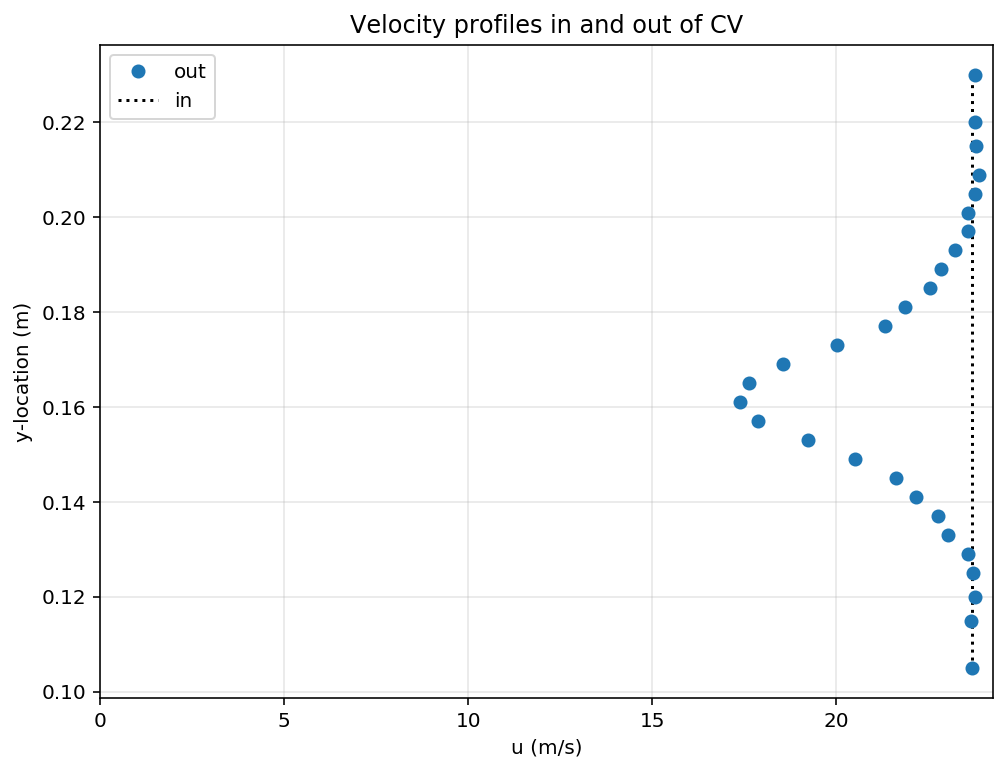

In [8]:
LBR = Experiment(
    'data/y_u_lbr.csv',
    {
        'rho_kgpm3': 1.158,
        'v_inf_mps': 23.68,
        'w_CV_m': 0.3,
        'q_inf_Pa': 324.71,
        'dP_Pa': 30.32,
        'd_obj_m': 0.01842
    }
)

LBR.report_drag()
LBR.visualize_c_mass()

In [9]:
HBR.dm

0.051529914000000177

In [10]:
LBR.dm

0.0637531109999997